Number of entries: 9894
Loading database: 337796 entries
Total synth path length: mean=1.6070268074735987,          max=13, min=0
Total synth path length: mean=3.3194706994328924,          max=13, min=0
4924 529


/tmp/ipykernel_2844570/1374302145.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(synth_path_len, kde=True, hist=False, label='all')
/tmp/ipykernel_2844570/1374302145.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wrong_pred_synth_path_len, kde=True, hist=False, labe

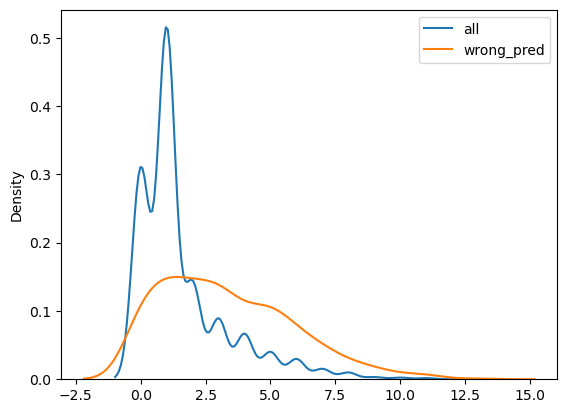

In [10]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analysis(result_path='3d_synth_log/analysis-20230330-0805/test_results.json',
             data_path='molecule_synth_data/cid2res170.json'):
    with open(result_path) as f:
        result = json.load(f)
    print(f'Number of entries: {len(result["cids"])}')
    with open(data_path) as f:
        data = json.load(f)
    print(f'Loading database: {len(data)} entries')
    synth_path_len = []
    is_correct_pred = []
    wrong_pred_synth_path_len = []
    for idx, cid in enumerate(result['cids']):
        if cid in data and data[cid] is not None:
            synth_path_len.append(data[cid]['route_len'])
            is_correct_pred.append(1 if result['y_true'][idx] == result['pred'][idx] else 0)
            if result['y_true'][idx] != result['pred'][idx]:
                wrong_pred_synth_path_len.append(data[cid]['route_len'])
    print(f'Total synth path length: mean={np.mean(synth_path_len)},\
          max={np.max(synth_path_len)}, min={np.min(synth_path_len)}')
    print(f'Total synth path length: mean={np.mean(wrong_pred_synth_path_len)},\
          max={np.max(wrong_pred_synth_path_len)}, min={np.min(wrong_pred_synth_path_len)}')
    print(len(synth_path_len), len(wrong_pred_synth_path_len))
    
    sns.distplot(synth_path_len, kde=True, hist=False, label='all')
    sns.distplot(wrong_pred_synth_path_len, kde=True, hist=False, label='wrong_pred')
    plt.legend()
    
analysis()

ValueError: The following variable cannot be assigned with wide-form data: `hue`